In [2]:
## Importing Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


## 1. Loading the data

In [174]:
df = pd.read_csv('./all_stocks_5yr.csv')

In [7]:
df.head(10)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


In [8]:
df.shape

(619040, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


## 2. Exploratory Data Analysis

In [11]:
### Checking for null values

df.isnull().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [14]:
df[df.isna().any(axis=1)]

,date,open,high,low,close,volume,Name
82949,2017-07-26,NaN,NaN,NaN,69.0842,3,BHF
165734,2015-07-17,NaN,88.76,88.24,88.7200,2056819,DHR
165857,2016-01-12,NaN,NaN,NaN,88.5500,0,DHR
205076,2015-07-17,NaN,48.49,47.85,47.9200,1246786,ES
239832,2016-07-01,NaN,NaN,NaN,49.5400,0,FTV
434379,2015-07-17,NaN,47.31,46.83,46.9900,1229513,O
434502,2016-01-12,NaN,NaN,NaN,52.4300,0,O
478594,2015-06-09,NaN,NaN,NaN,526.0900,12135,REGN
558213,2016-04-07,NaN,NaN,NaN,41.5600,0,UA
581906,2015-05-12,NaN,NaN,NaN,124.0800,569747,VRTX


### Removing null values
Since only a small amount of data contains null value we will remove these rows

In [175]:
df.dropna(ignore_index=True, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619029 entries, 0 to 619028
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619029 non-null  object 
 1   open    619029 non-null  float64
 2   high    619029 non-null  float64
 3   low     619029 non-null  float64
 4   close   619029 non-null  float64
 5   volume  619029 non-null  int64  
 6   Name    619029 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [17]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [20]:
df['Name'].nunique()

505

In [21]:
df['Name'].value_counts().max()

1259

In [22]:
df['Name'].value_counts().min()

44

In [30]:
sf = df['Name'].value_counts()
sf[sf == 1259]

Name
AAL     1259
NOV     1259
NLSN    1259
NKE     1259
NI      1259
        ... 
EQT     1259
DIS     1259
DLR     1259
DLTR    1259
DTE     1259
Name: count, Length: 468, dtype: int64

In [54]:
filter_df = df.groupby(['Name']).sum('volume').sort_values(by = 'volume',ascending=False)
filter_df.head(10)

,open,high,low,close,volume
Name,,,,,
BAC,22292.6398,22493.8851,22081.8351,22289.5600,117884953591
AAPL,137300.7850,138428.4580,136150.2604,137314.9734,68046305767
GE,33400.2499,33632.1975,33156.5777,33396.6640,53023644686
F,17767.8498,17914.2024,17593.3269,17755.2200,43388129992
FB,121436.9197,122609.9049,120187.9662,121466.5704,43258314899
MSFT,64242.2304,64757.9329,63743.6695,64288.4185,42641653597
AMD,7055.8329,7198.0141,6907.6707,7052.7450,40941468586
MU,28939.2230,29378.2445,28460.0824,28922.4941,38082749687
INTC,40041.9061,40395.6653,39707.5002,40075.8972,36922332801


**Top 10 Companies with highest volumes**

BAC - Bank of America\
AAPL - Apple\
GE - General Electric\
F - Ford\
FB - Facebook\
MSFT - Microsoft\
AMD - Advanced Micro Devices\
INTC - Intel Corp\
CSCO - Cisco 

In [55]:
filter_df.tail(10)

,open,high,low,close,volume
Name,,,,,
SNA,175326.945,176675.7131,173925.7070,175366.1000,530283843
ESS,261471.045,263681.1862,259187.0043,261511.3400,477004832
RE,230230.725,231959.8122,228492.2963,230274.7800,434037215
DXC,18465.805,18629.4135,18319.5162,18475.4700,424529395
HII,168337.265,169919.3432,166769.2972,168454.4500,418791148
WLTW,70686.220,71243.6739,70070.8975,70719.3700,414734590
AZO,780165.305,786794.8499,773371.4067,780206.9000,397585127
MTD,448330.940,452312.3815,444527.0450,448578.5500,214489754
BHF,8531.905,8633.1542,8428.1341,8530.8868,144878389


**Top 10 Companies with lowest volumes**

APTV - Aptiv PLC \
BHF - Brighthouse Financial \
MTD - Mettler-Toledo International \
AZO - Autozone\
WLTW - Willis Towers Watson Public Limited Company\
HII - Huntington Ingalls Industries\
DXC - DXC Technology\
RE  - RE Royalties\
ESS - Essex Property Trust \
SNA - Snap-On

### Selecting Data

In [91]:
company = list(filter_df.head(10).index)
company

['BAC', 'AAPL', 'GE', 'F', 'FB', 'MSFT', 'AMD', 'MU', 'INTC', 'CSCO']

In [182]:
data = df[df["Name"].isin(company)].reset_index(drop=True)

In [183]:
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


### Converting Date

For further analysis of data we need date to be in the appropriate format. Using the pandas function we can convert the object type date to datetime format

In [203]:
data.to_csv("10 company.csv")

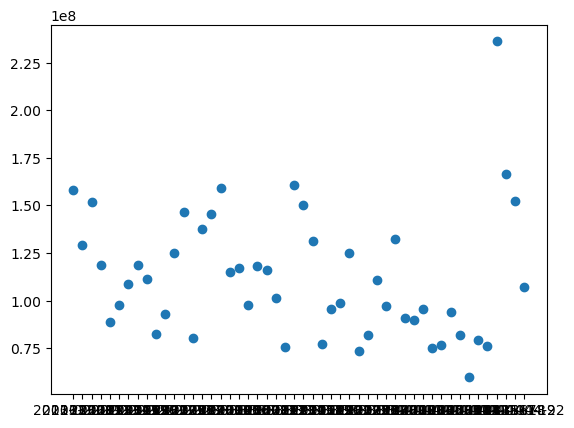

In [62]:
plt.scatter(x=data['date'][:50],y=data['volume'][:50])

In [190]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12590 entries, 0 to 12589
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               12590 non-null  datetime64[ns]
 1   open               12590 non-null  float64       
 2   high               12590 non-null  float64       
 3   low                12590 non-null  float64       
 4   close              12590 non-null  float64       
 5   volume             12590 non-null  int64         
 6   Name               12590 non-null  object        
 7   price_chang        12589 non-null  float64       
 8   price_change_pct   12589 non-null  float64       
 9   volume_change      12589 non-null  float64       
 10  volume_change_pct  12589 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 1.1+ MB


In [184]:
data_cp = data.copy()

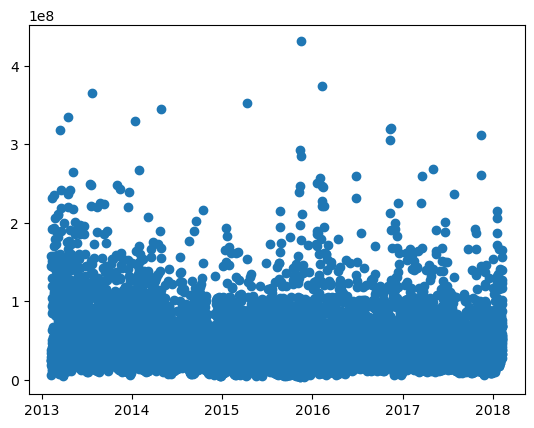

In [65]:
plt.scatter(x=data['date'],y=data['volume'])

In [69]:
data.describe()

,date,open,high,low,close,volume
count,12590,12590.000000,12590.000000,12590.000000,12590.000000,1.259000e+04
mean,2015-08-09 05:44:16.393963520,40.300525,40.666639,39.923701,40.309134,4.132370e+07
min,2013-02-08 00:00:00,1.620000,1.690000,1.610000,1.620000,2.606577e+06
25%,2014-05-09 00:00:00,15.900000,16.040000,15.732500,15.870000,2.211401e+07
50%,2015-08-10 00:00:00,27.220000,27.450000,26.985000,27.232500,3.105966e+07
75%,2016-11-07 00:00:00,45.545000,46.085000,45.092500,45.595000,4.849717e+07
max,2018-02-07 00:00:00,192.040000,195.320000,189.980000,193.090000,4.313326e+08
std,NaN,37.920988,38.211248,37.615958,37.932401,3.253543e+07


### Stock price and Volume Analysis

**Closing Price**\
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

**Volume of Sales**\
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.


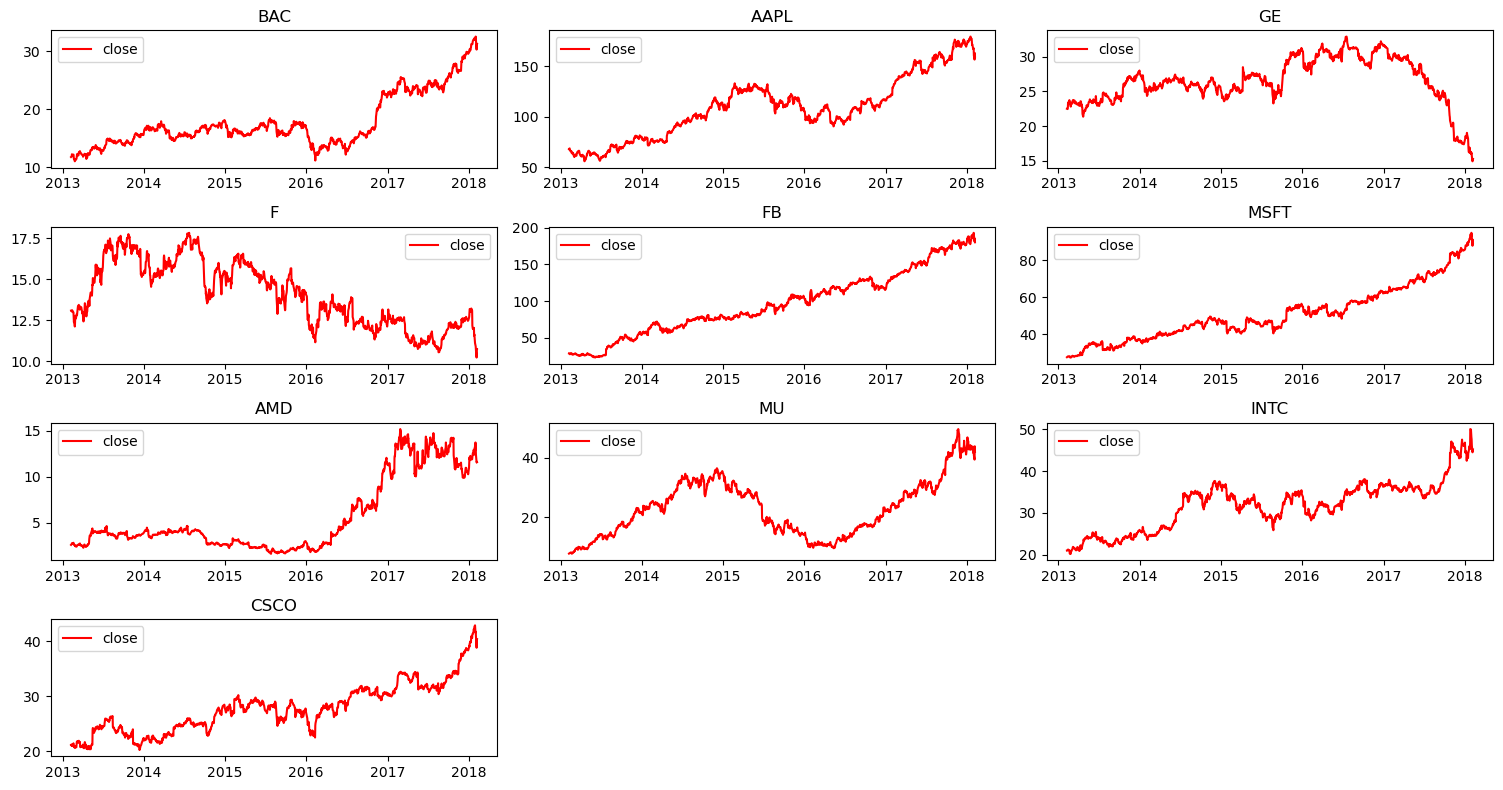

In [120]:
### Plotting closing price of each company over the years
plt.figure(figsize=(15, 8)) 
for index, comp in enumerate(company, 1): 
    plt.subplot(4, 3, index) 
    c = data[data['Name'] == comp] 
    plt.plot(c['date'], c['close'], c="r", label="close") 
    plt.title(comp) 
    plt.legend() 
    plt.tight_layout()

For the above plot, we can see that mostly the stock prices have gone up in the span of 5 years. There are only 2 companies whose stock went down that is `General Electric` and `Ford`. \
Additionally, Facebook has witnessed highest growth and apple the second highest. On the other hand AMD witnessed the lowest growth. 

Let's take a quick look at the numbers of Apple, facebook, and AMD 

In [123]:
data[data['Name'] == 'AAPL'].describe()

,date,open,high,low,close,volume
count,1259,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,2015-08-09 05:44:16.393963264,109.055429,109.951118,108.141589,109.066698,5.404790e+07
min,2013-02-08 00:00:00,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,2014-05-10 12:00:00,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,2015-08-10 00:00:00,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,2016-11-05 12:00:00,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,2018-02-07 00:00:00,179.370000,180.100000,178.250000,179.260000,2.668336e+08
std,NaN,30.549220,30.686186,30.376224,30.556812,3.346835e+07


In [124]:
data[data['Name'] == 'FB'].describe()

,date,open,high,low,close,volume
count,1259,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,2015-08-09 05:44:16.393963264,96.455059,97.386739,95.463039,96.478610,3.435927e+07
min,2013-02-08 00:00:00,22.990000,23.090000,22.670000,22.899000,5.913066e+06
25%,2014-05-10 12:00:00,64.720000,65.617800,63.880000,64.861750,1.780491e+07
50%,2015-08-10 00:00:00,90.590000,92.060000,89.650000,90.950000,2.608916e+07
75%,2016-11-05 12:00:00,125.785000,126.680000,124.950000,126.145000,4.252176e+07
max,2018-02-07 00:00:00,192.040000,195.320000,189.980000,193.090000,3.653806e+08
std,NaN,43.765800,43.972039,43.542059,43.799446,2.672781e+07


In [126]:
data[data['Name'] == 'AMD'].describe()

,date,open,high,low,close,volume
count,1259,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,2015-08-09 05:44:16.393963264,5.604315,5.717247,5.486633,5.601863,3.251904e+07
min,2013-02-08 00:00:00,1.620000,1.690000,1.610000,1.620000,2.606577e+06
25%,2014-05-10 12:00:00,2.670000,2.720000,2.630000,2.670000,1.240657e+07
50%,2015-08-10 00:00:00,3.850000,3.930000,3.790000,3.850000,2.222858e+07
75%,2016-11-05 12:00:00,7.490000,7.640000,7.270000,7.495000,4.174201e+07
max,2018-02-07 00:00:00,15.450000,15.650000,14.520000,15.200000,2.683365e+08
std,NaN,3.979483,4.054507,3.889996,3.971779,3.079792e+07


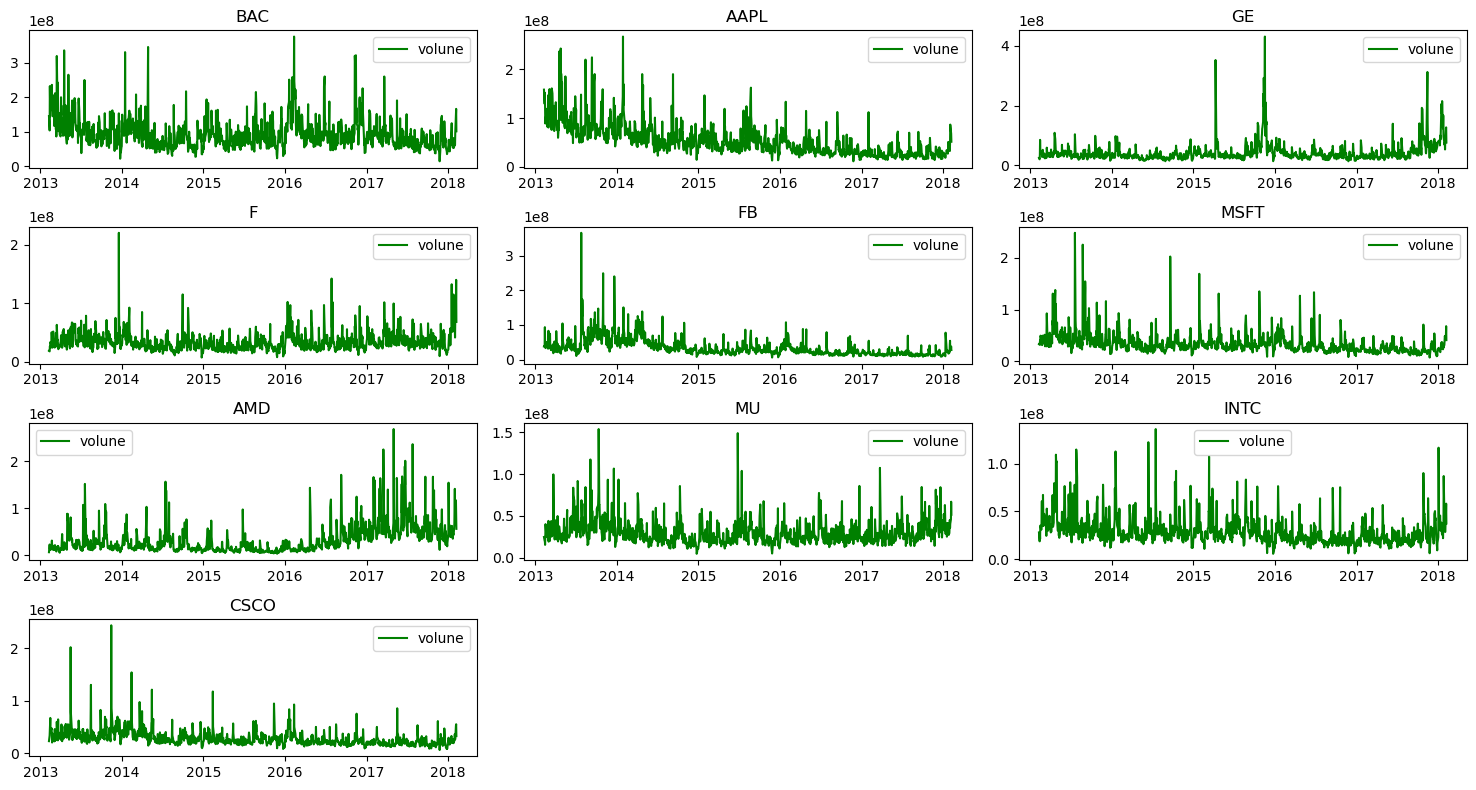

In [171]:
### Plotting sales volume of each company.
plt.figure(figsize=(15, 8)) 
for index, comp in enumerate(company, 1): 
    plt.subplot(4, 3, index) 
    c = data[data['Name'] == comp] 
    plt.plot(c['date'], c['volume'], c="g", label="volune") 
    plt.title(comp) 
    plt.legend() 
    plt.tight_layout()

Following observation can be made from the above plot.

1. FB, MSFT, AAPL, and GE: Noticeable peaks in 2013 and 2016-2017, reflecting external market changes or company-specific events.
2. MU, AMD, and INTC: Show higher trading volume on average, especially in later years, suggesting growing investor interest or volatility.
3. BAC, AMD, and MU appear to have more frequent spikes compared to others, signaling frequent trading activity.
4. FB and GE have fewer but sharper peaks, indicating specific periods of concentrated interest.

**Next Steps**

Overlay these plots with stock price data to understand how volume spikes impact prices.


/var/folders/d4/tmx_spfj2yn97sw31xpylfq80000gn/T/ipykernel_41194/3629133202.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


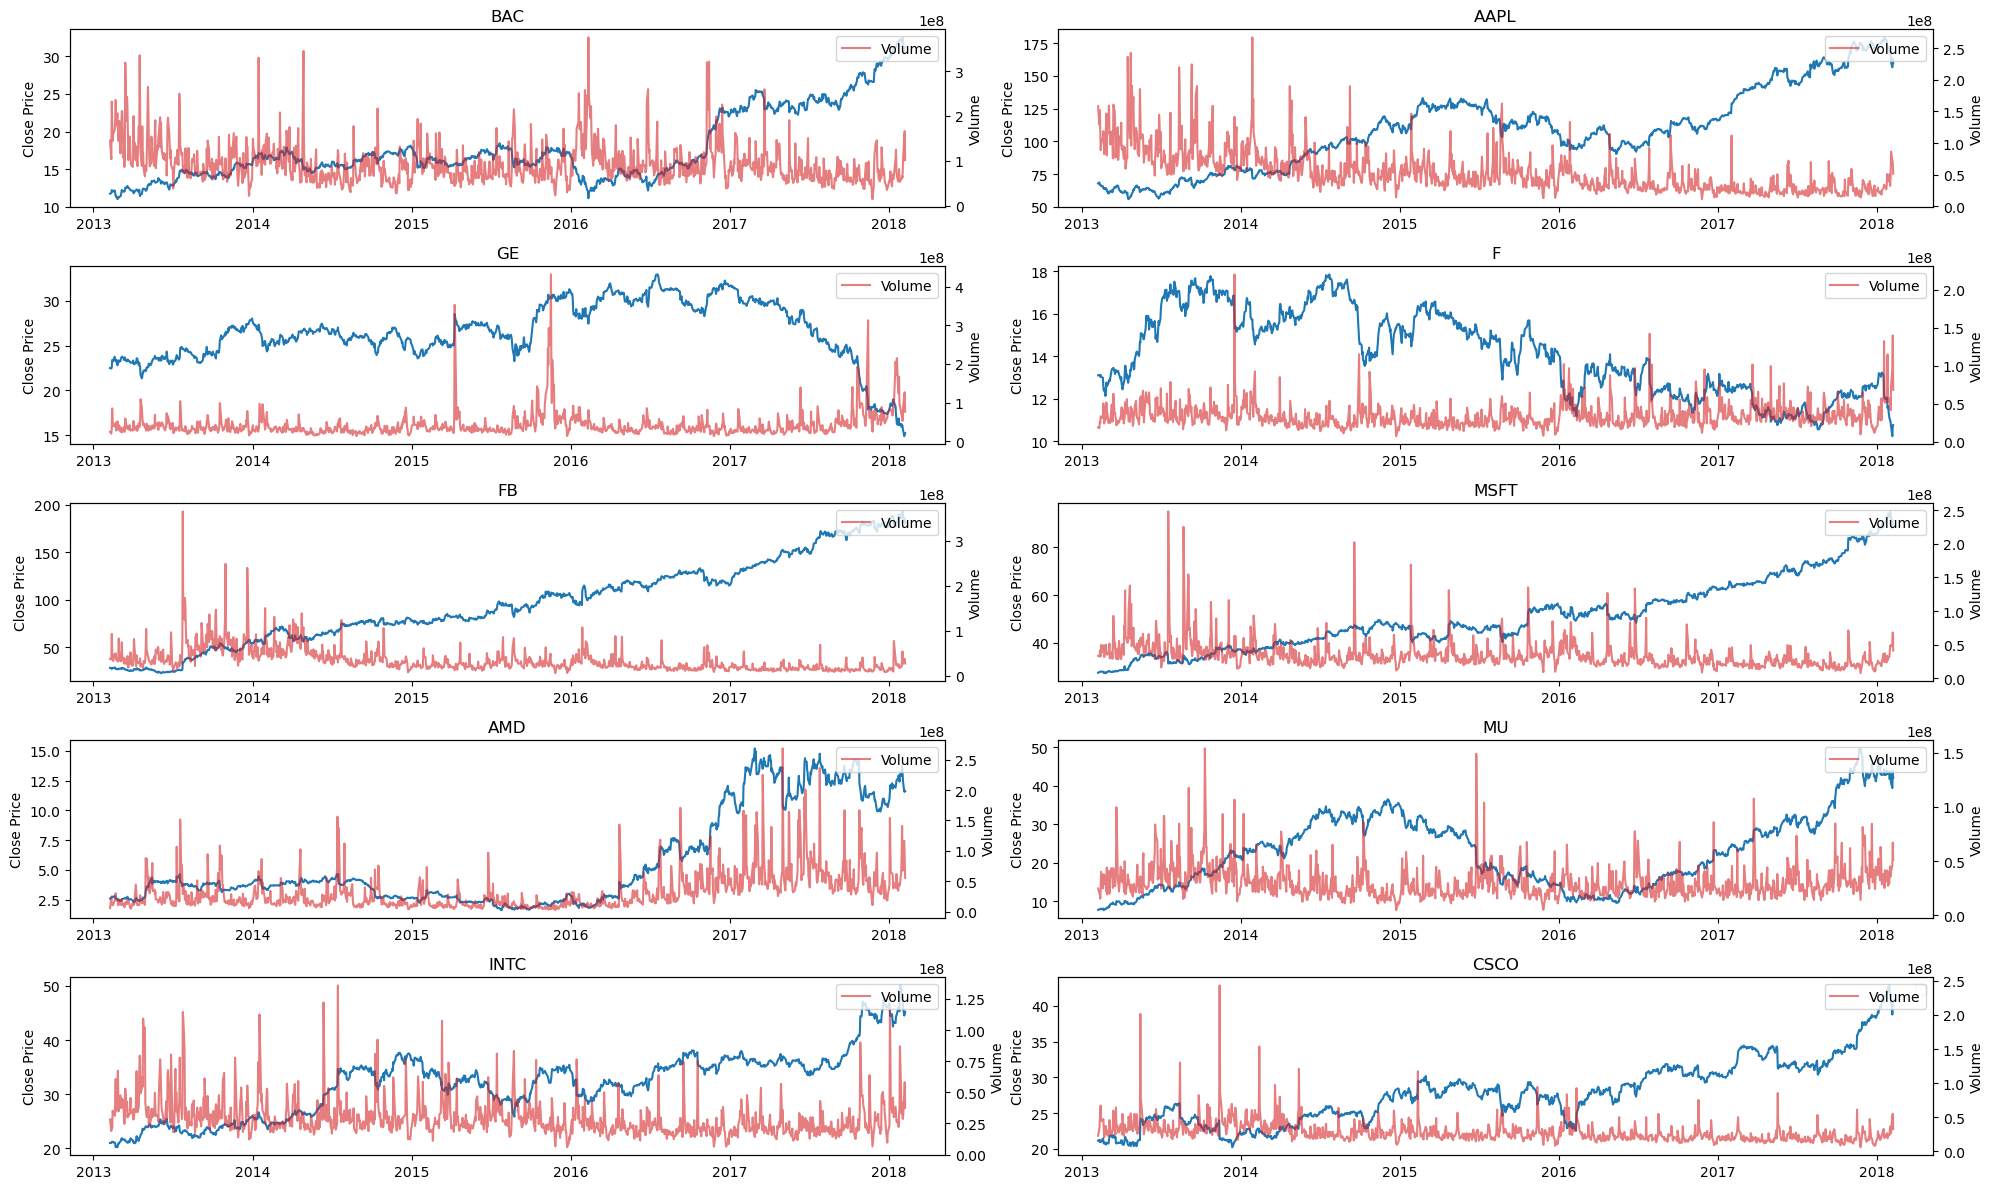

In [198]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 12))  # Adjust for 10 plots
axes = axes.flatten()

for i, comp in enumerate(company):
    ax1 = axes[i]
    d = data[data['Name'] == comp]  # Filter data by company
    
    ax1.plot(d['date'], d['close'], color='tab:blue', label='Close Price')
    ax1.set_title(comp)
    ax1.set_ylabel('Close Price')
    
    ax2 = ax1.twinx()
    ax2.plot(d['date'], d['volume'], color='tab:red', alpha=0.6, label='Volume')
    ax2.set_ylabel('Volume')
    plt.legend()

fig.tight_layout()
plt.show()

In [185]:
data['price_change'] = data['close'].diff()
data['price_change_pct'] = data['close'].pct_change()

In [186]:
data['volume_change'] = data['volume'].diff()
data['volume_change_pct'] = data['volume'].pct_change()

In [187]:
data.head()

,date,open,high,low,close,volume,Name,price_chang,price_change_pct,volume_change,volume_change_pct
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.7072,0.010422,-29138991.0,-0.184228
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.7186,-0.025067,22799938.0,0.176703
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.1272,-0.001903,-33107368.0,-0.218056
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,-0.0600,-0.000899,-29912841.0,-0.251957


In [206]:
data.describe()

,date,open,high,low,close,volume,price_chang,price_change_pct,volume_change,volume_change_pct
count,12590,12590.000000,12590.000000,12590.000000,12590.000000,1.259000e+04,12589.000000,12589.000000,1.258900e+04,12589.000000
mean,2015-08-09 05:44:16.393963520,40.300525,40.666639,39.923701,40.309134,4.132370e+07,-0.002053,0.000713,-8.484680e+03,0.074144
min,2013-02-08 00:00:00,1.620000,1.690000,1.610000,1.620000,2.606577e+06,-167.080000,-0.983766,-2.535572e+08,-0.884287
25%,2014-05-09 00:00:00,15.900000,16.040000,15.732500,15.870000,2.211401e+07,-0.190000,-0.007519,-6.843674e+06,-0.201089
50%,2015-08-10 00:00:00,27.220000,27.450000,26.985000,27.232500,3.105966e+07,0.010000,0.000503,-5.592170e+05,-0.020918
75%,2016-11-07 00:00:00,45.545000,46.085000,45.092500,45.595000,4.849717e+07,0.240000,0.009264,6.304481e+06,0.226786
max,2018-02-07 00:00:00,192.040000,195.320000,189.980000,193.090000,4.313326e+08,14.660000,1.091078,2.925520e+08,9.264611
std,NaN,37.920988,38.211248,37.615958,37.932401,3.253543e+07,2.330365,0.027229,2.186868e+07,0.470316


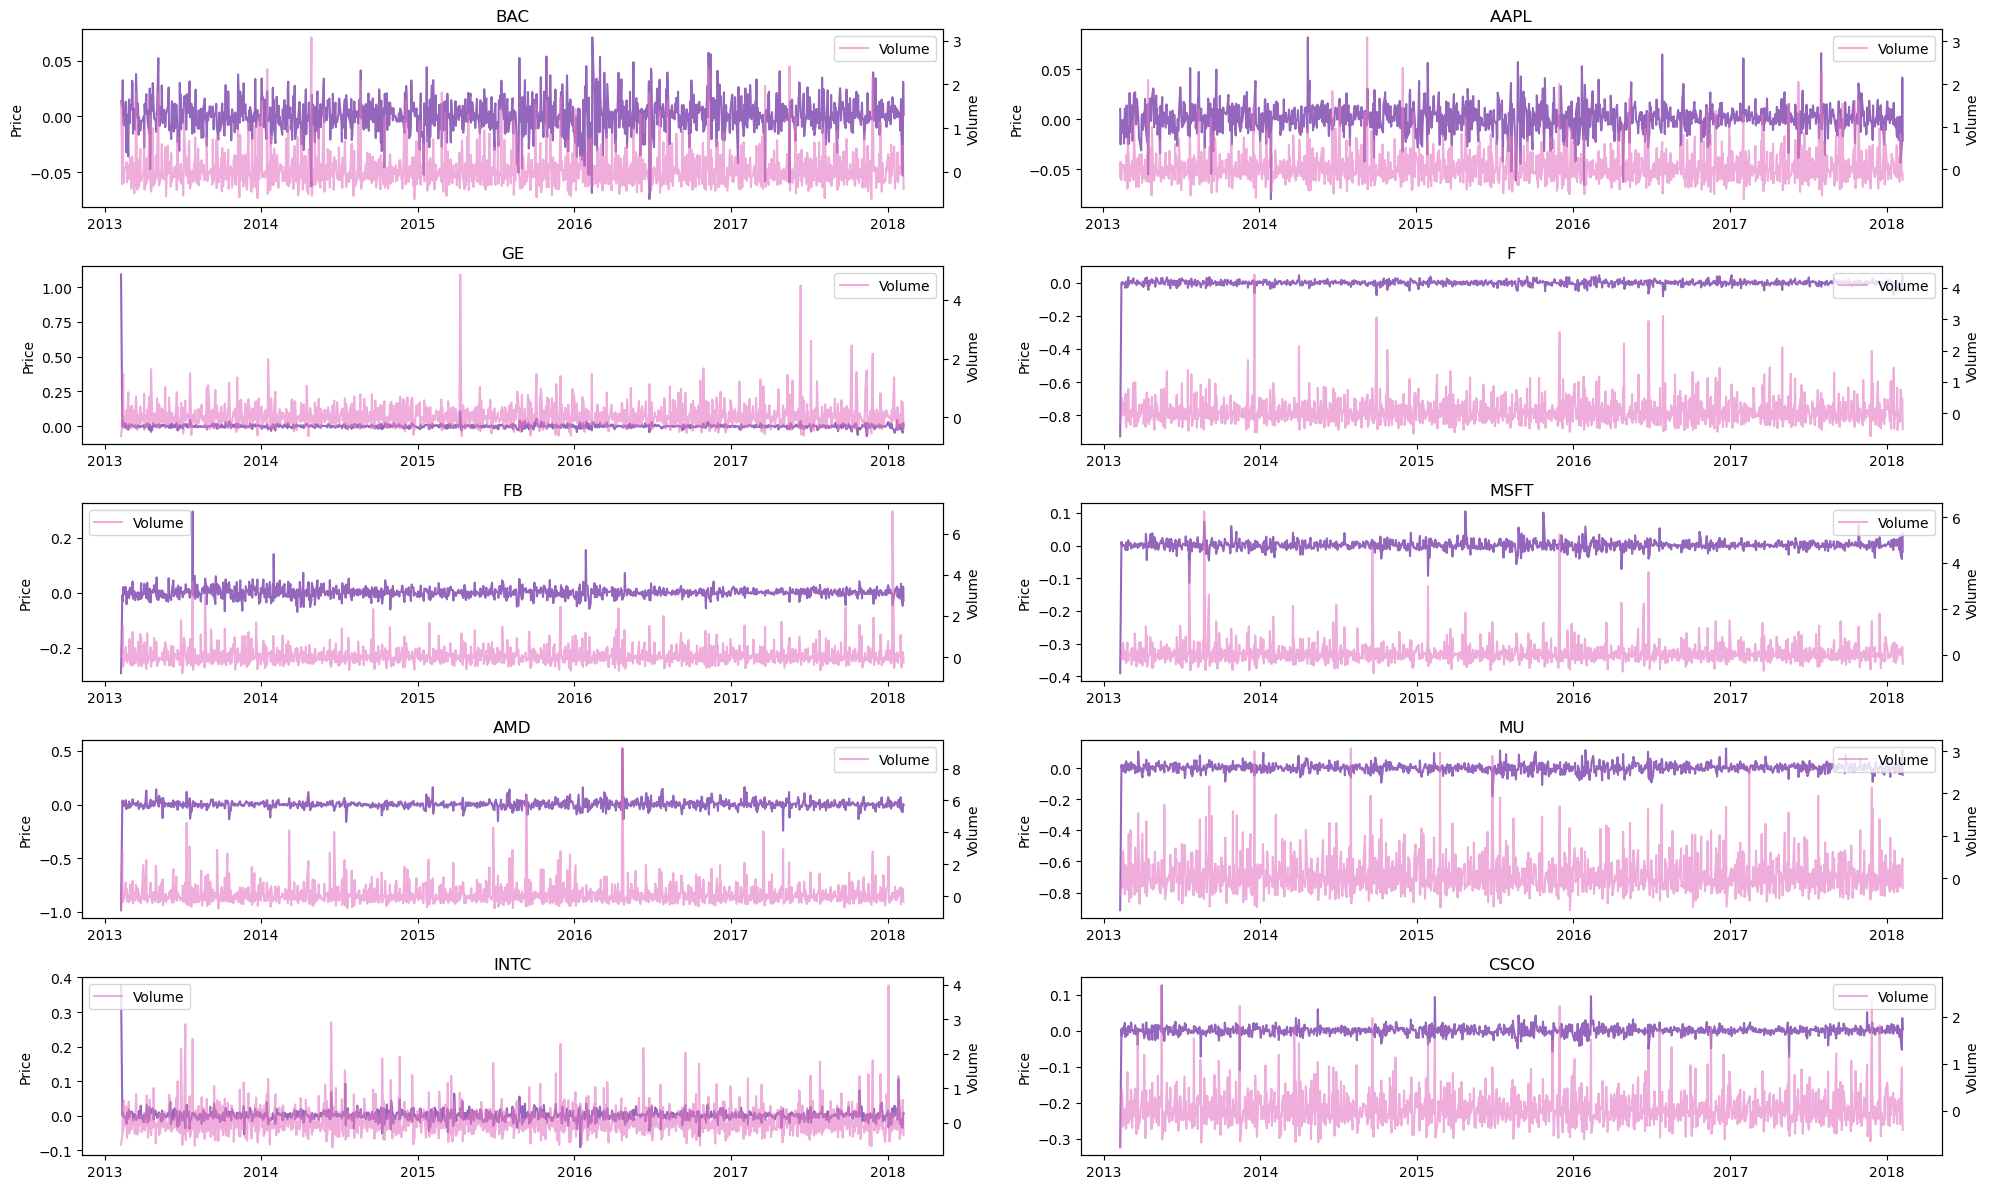

In [204]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 12))  # Adjust for 10 plots
axes = axes.flatten()

for i, comp in enumerate(company):
    ax1 = axes[i]
    d = data[data['Name'] == comp]  # Filter data by company
    
    ax1.plot(d['date'], d['price_change_pct'], color='tab:purple', label='Close Price')
    ax1.set_title(comp)
    ax1.set_ylabel('Price')
    
    ax2 = ax1.twinx()
    ax2.plot(d['date'], d['volume_change_pct'], color='tab:pink', alpha=0.6, label='Volume')
    ax2.set_ylabel('Volume')
    plt.legend()

fig.tight_layout()
plt.show()

In [193]:
for comp in company:
    d = data[data['Name'] == comp]
    correlation = d['price_change_pct'].corr(d['volume_change_pct'])
    print(f" {comp} : {correlation}")

 BAC : -0.053144526799292525
 AAPL : -0.11011909528633985
 GE : -0.03418876380482608
 F : -0.06808016715461215
 FB : 0.044474414902103146
 MSFT : -0.016644891890951523
 AMD : 0.22601571414042093
 MU : -0.02127607098061307
 INTC : -0.031443717967737386
 CSCO : -0.010366982834805546


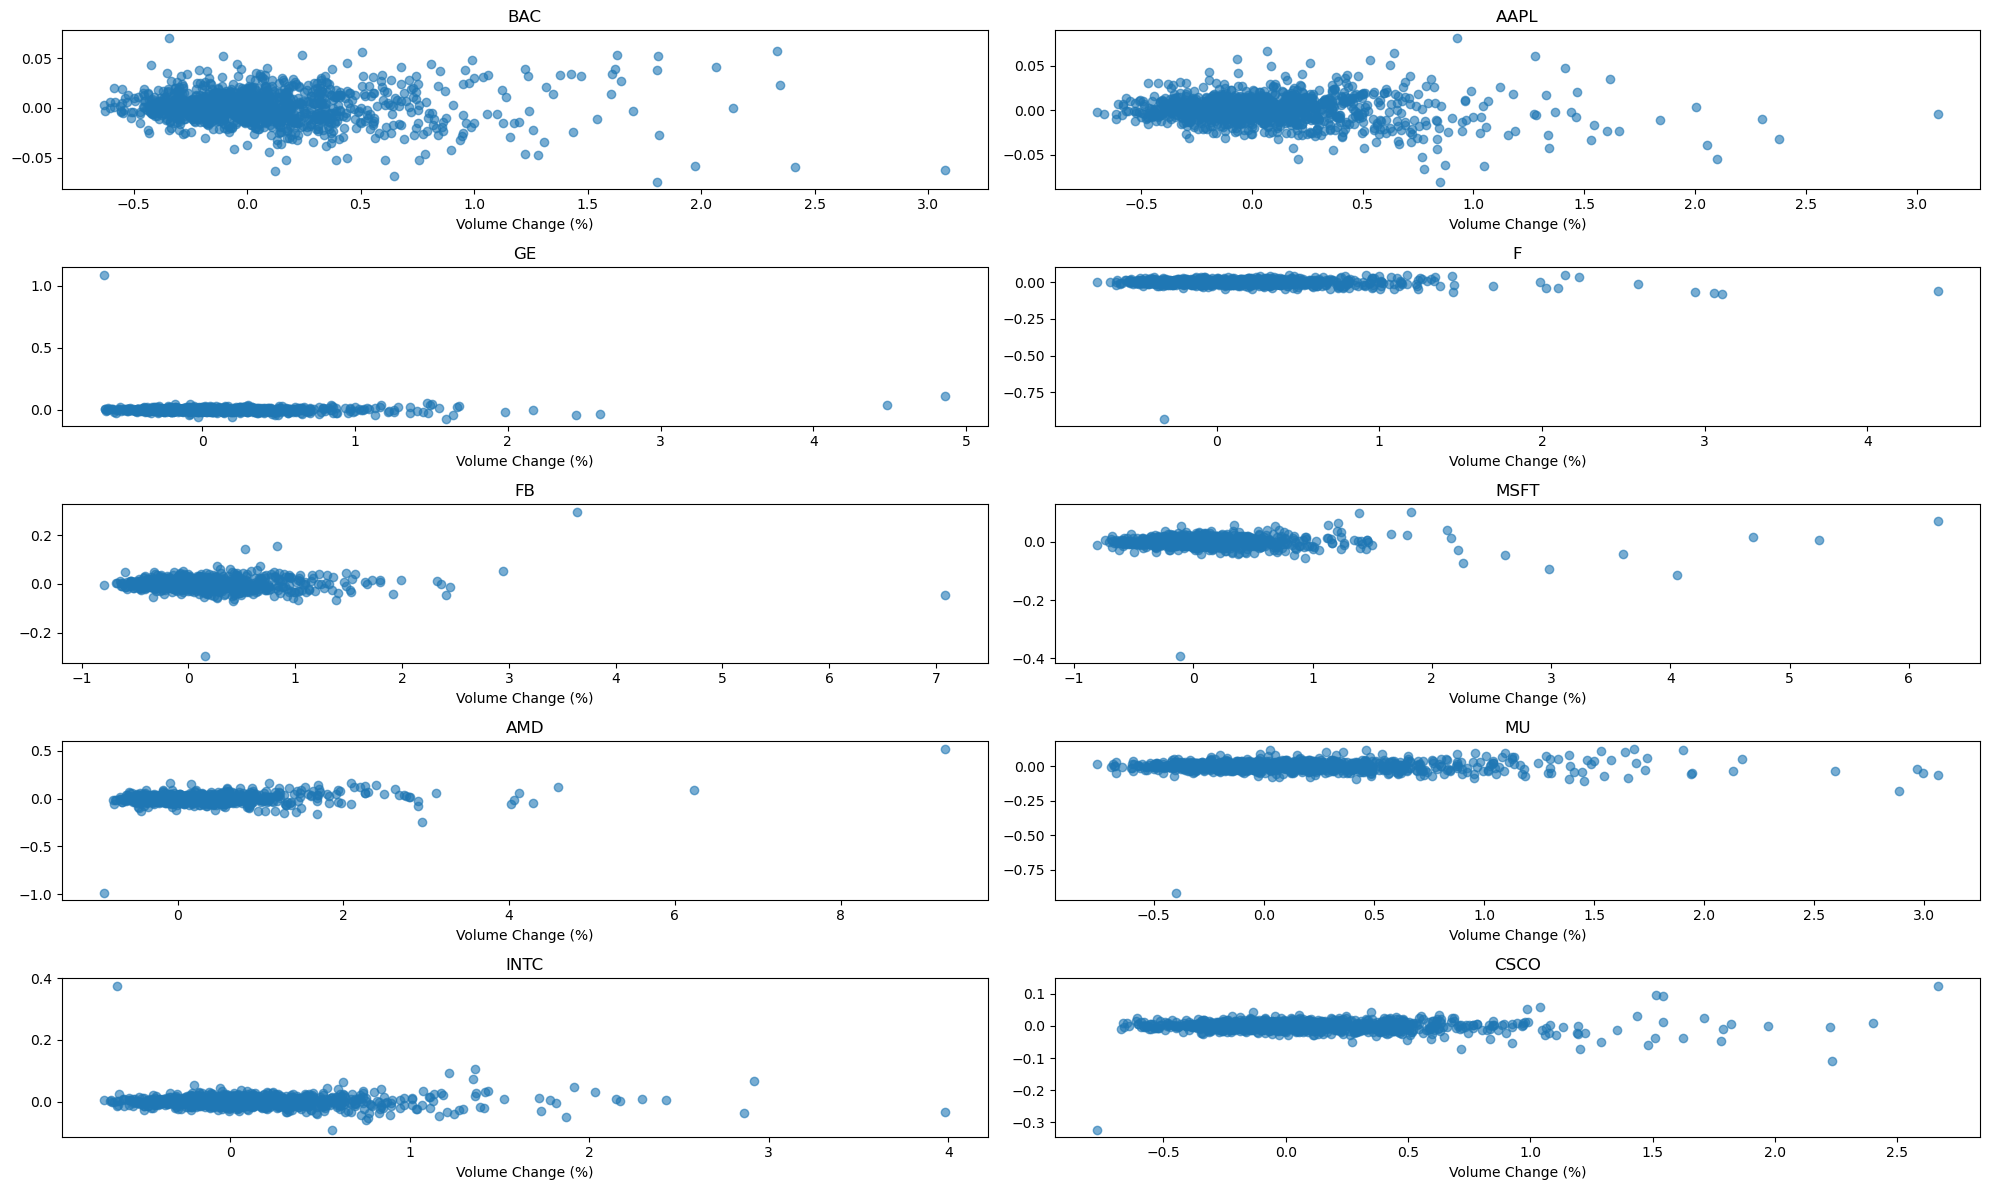

In [205]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 12))  # Adjust for 10 plots
axes = axes.flatten()

for i, comp in enumerate(company):
    ax1 = axes[i]
    d = data[data['Name'] == comp]  # Filter data by company
    
    ax1.scatter(d['volume_change_pct'], d['price_change_pct'], alpha=0.6, color='tab:blue', label='Close Price')
    ax1.set_title(comp)
    ax1.set_xlabel('Volume Change (%)')
    ax2.set_ylabel('Price Change (%)')

fig.tight_layout()
plt.show()

Based on the above analysis of stock price and volume these results can be drawn.

1. Positive Correlation:\
    AMD with a correlation of 0.226 suggests that, for this stock, there may be a slight tendency for price to rise as volume increases.

2. Negative Correlation:\
AAPL and GE have the weakest negative correlations (around -0.110 and -0.034 respectively), indicating minimal relationships between price and volume, but with small negative effects.

4. Near Zero Correlations:\
Most other stocks show very weak or negligible correlations (close to 0), suggesting that volume and price changes are largely independent for these stocks.

**Overall Conclusion:**\
There is no strong evidence that volume changes significantly impact stock price movements for most companies in this analysis.
AMD stands out as the only stock with a moderately positive correlation, which could indicate some market behavior where higher volume correlates with price increases, possibly due to investor sentiment or news events.

In [207]:
threshold = 0.5  # Example threshold
filtered_df = data[abs(data['volume_change_pct']) > threshold]

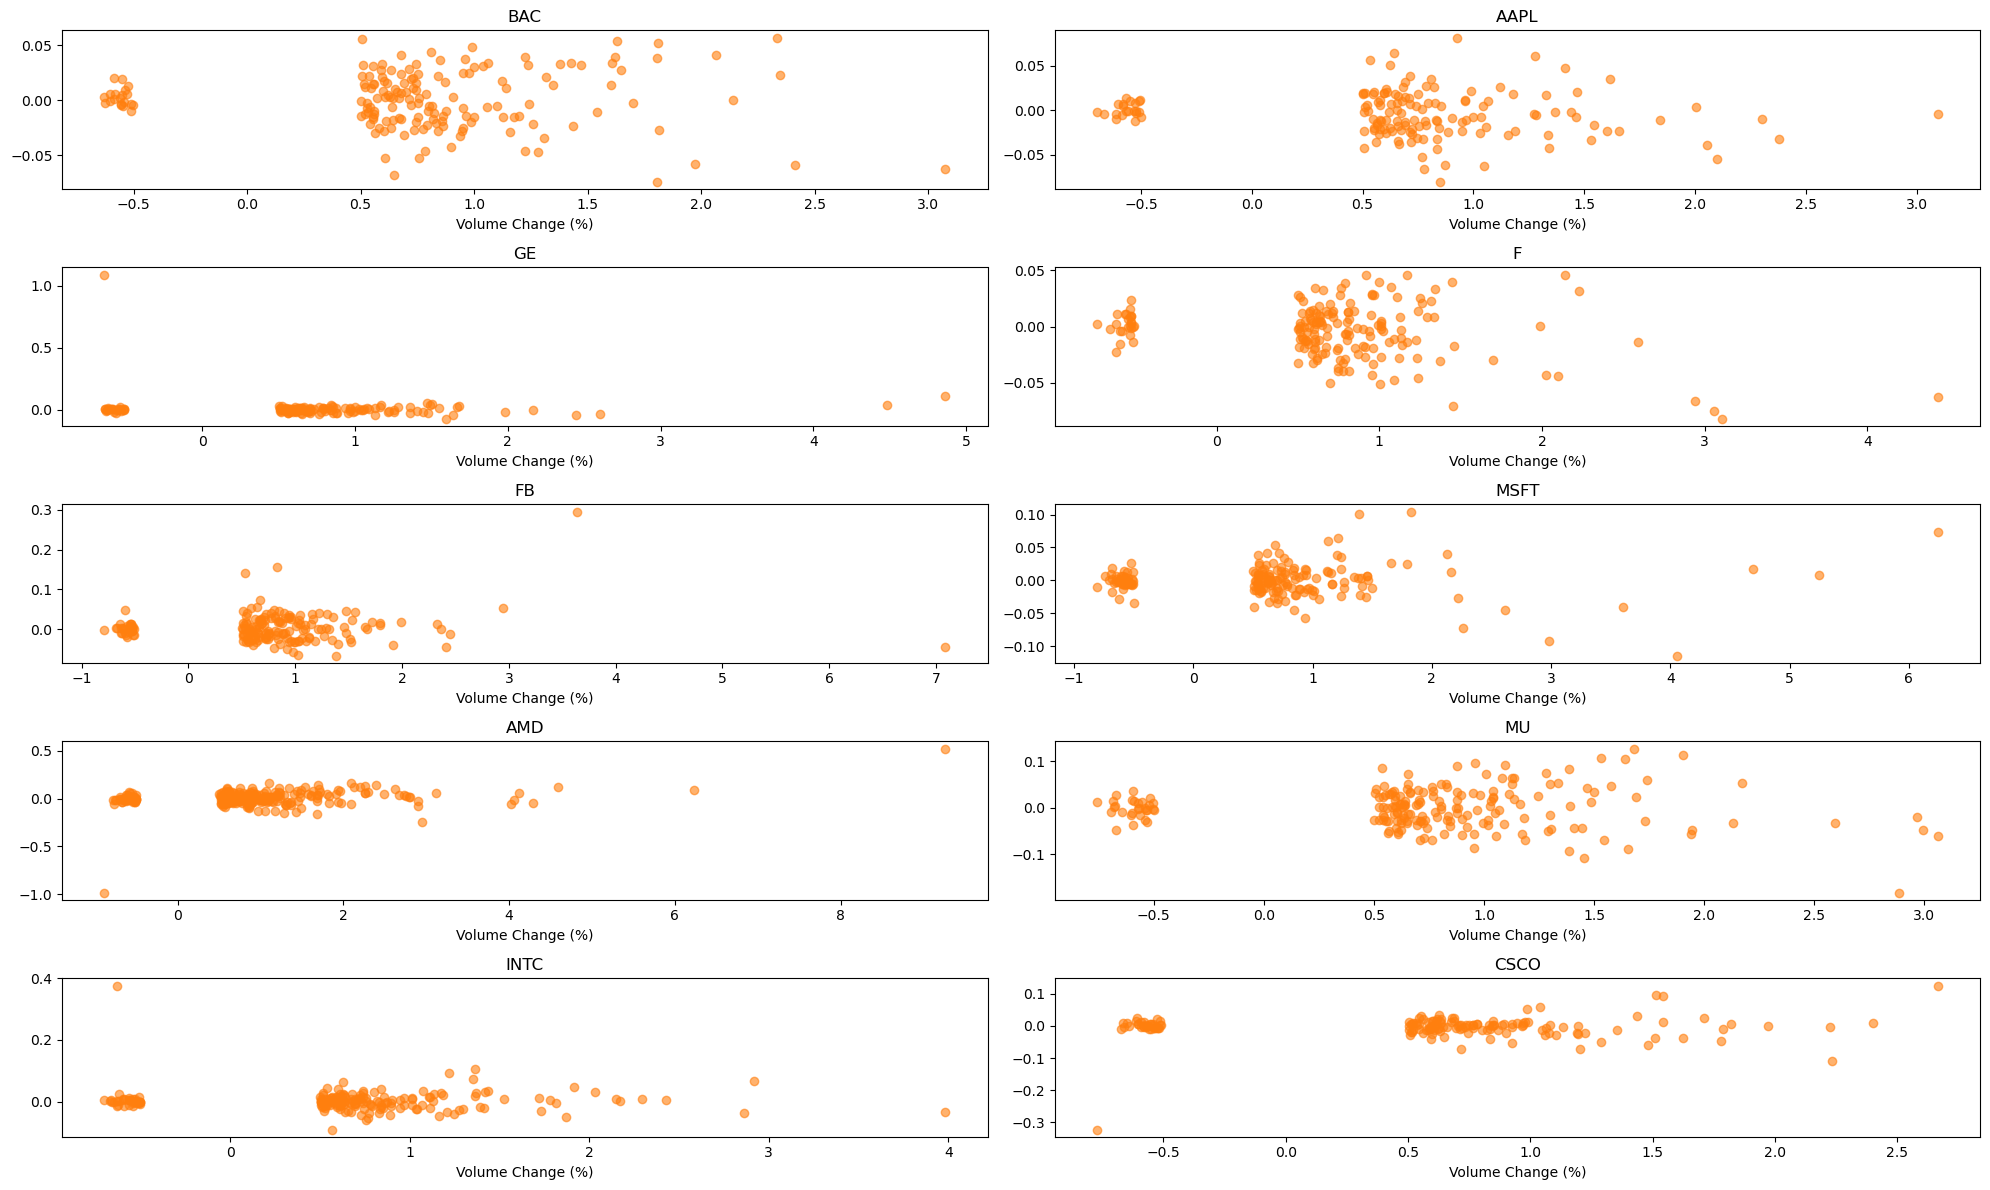

In [211]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 12))  # Adjust for 10 plots
axes = axes.flatten()

for i, comp in enumerate(company):
    ax1 = axes[i]
    d = filtered_df[filtered_df['Name'] == comp]  # Filter data by company
    
    ax1.scatter(d['volume_change_pct'], d['price_change_pct'], alpha=0.6, color='tab:orange', label='Close Price')
    ax1.set_title(comp)
    ax1.set_xlabel('Volume Change (%)')
    ax2.set_ylabel('Price Change (%)')

fig.tight_layout()
plt.show()

**There is no strong evidence that volume changes significantly impact stock price movements for most companies in this analysis.**